<h1 style="border: 2px solid cyan; border-radius: 8px; padding: 8px; text-align: center;"> Exploratory Data Analysis and Visualization Showcase </h1>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1| Data Selection


- Dataset Name: Algerian Forest Fires Dataset
- Data Source: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset
- Brief Description: The Algerian forest fires dataset consists of 244 instances, with 122 instances for each of the two regions: Bejaia and Sidi Bel-abbes. The dataset covers a period from June 2012 to September 2012.


### Variable Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire


## 2| Data Loading and Transformation


- Note: I manually restructured the `Algerian_forest_fires_dataset_UPDATE.csv` file for better usability.

### White space removal

In [2]:
def remove_white_space(input_file, output_file="output.csv"):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file)

    # Remove whitespaces from all columns
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # Save the cleaned DataFrame as a CSV file
    df.to_csv(output_file, index=False)

In [3]:
remove_white_space(
    input_file="./algerian+forest+fires+dataset/Algerian_forest_fires.csv",
    output_file="./algerian+forest+fires+dataset/Algerian_forest_fires_no_white_space.csv",
)
remove_white_space(
    input_file="./algerian+forest+fires+dataset/Bejaia Region Dataset.csv",
    output_file="./algerian+forest+fires+dataset/Bejaia Region Dataset_no_white_space.csv",
)
remove_white_space(
    input_file="./algerian+forest+fires+dataset/Sidi-Bel Abbes Region Dataset.csv",
    output_file="./algerian+forest+fires+dataset/Sidi-Bel Abbes Region Dataset_no_white_space.csv",
)

### Loading data

In [4]:
df = pd.read_csv(
    "./algerian+forest+fires+dataset/Algerian_forest_fires_no_white_space.csv",
)
bejaia_df = pd.read_csv(
    "./algerian+forest+fires+dataset/Bejaia Region Dataset_no_white_space.csv",
    index_col=["day", "month", "year"],
)
sidi_bel_abbes_df = pd.read_csv(
    "./algerian+forest+fires+dataset/Sidi-Bel Abbes Region Dataset_no_white_space.csv",
    index_col=["day", "month", "year"],
)

### Handling missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [6]:
bejaia_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 122 entries, (1, 6, 2012) to (30, 9, 2012)
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  122 non-null    int64  
 1   RH           122 non-null    int64  
 2   Ws           122 non-null    int64  
 3   Rain         122 non-null    float64
 4   FFMC         122 non-null    float64
 5   DMC          122 non-null    float64
 6   DC           122 non-null    float64
 7   ISI          122 non-null    float64
 8   BUI          122 non-null    float64
 9   FWI          122 non-null    float64
 10  Classes      122 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
sidi_bel_abbes_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 122 entries, (1, 6, 2012) to (30, 9, 2012)
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  122 non-null    int64  
 1   RH           122 non-null    int64  
 2   Ws           122 non-null    int64  
 3   Rain         122 non-null    float64
 4   FFMC         122 non-null    float64
 5   DMC          122 non-null    float64
 6   DC           122 non-null    object 
 7   ISI          122 non-null    float64
 8   BUI          122 non-null    float64
 9   FWI          122 non-null    object 
 10  Classes      121 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 12.6+ KB


- Since there is only one row with a missing value, we can safely replace that value with the last valid observation without significantly impacting the results.


In [8]:
df.fillna(method="ffill", inplace=True)

In [9]:
sidi_bel_abbes_df.fillna(method="ffill", inplace=True)

### Tarnsforming categorical values into numerical values

In [10]:
ndf = df.astype('category').apply(lambda x: x.cat.codes)
nb_df = bejaia_df.astype('category').apply(lambda x: x.cat.codes)
ns_df = sidi_bel_abbes_df.astype('category').apply(lambda x: x.cat.codes)

## 3| Exploratory Data Analysis (EDA)

###  Statistical Summaries

In [11]:
ndf.iloc[:,3:].describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,9.176230,33.959016,8.475410,4.692623,95.709016,72.897541,103.639344,39.475410,77.524590,48.057377,0.434426
std,3.601224,14.598832,2.673489,8.630014,49.009713,46.765523,57.469200,29.362699,50.341421,41.246085,0.496700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,7.000000,0.000000,55.750000,34.000000,52.750000,14.000000,32.000000,7.000000,0.000000
50%,9.000000,35.000000,8.000000,0.000000,103.500000,69.000000,107.500000,32.000000,74.500000,41.000000,0.000000
75%,12.000000,45.250000,10.000000,5.000000,141.000000,110.250000,153.250000,62.000000,120.250000,86.000000,1.000000
max,18.000000,61.000000,17.000000,38.000000,172.000000,165.000000,197.000000,105.000000,173.000000,125.000000,1.000000


In [12]:
nb_df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,8.196721,20.606557,4.975410,3.713115,54.114754,41.786885,48.565574,27.631148,44.139344,24.622951,0.516393
std,3.276864,10.131007,2.773735,6.043205,30.008593,27.254306,32.598481,19.093160,29.280438,21.663210,0.501792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,13.000000,3.000000,0.000000,28.250000,16.250000,18.250000,11.250000,18.000000,5.000000,0.000000
50%,8.000000,21.000000,5.000000,0.000000,56.500000,39.500000,46.500000,24.500000,42.500000,18.500000,1.000000
75%,11.000000,29.750000,7.000000,5.000000,80.750000,63.750000,76.750000,41.000000,68.750000,41.750000,1.000000
max,14.000000,38.000000,12.000000,24.000000,100.000000,93.000000,107.000000,66.000000,98.000000,70.000000,1.000000


In [13]:
ns_df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,8.172131,27.172131,7.942623,3.877049,51.795082,51.262295,55.393443,36.049180,54.639344,38.590164,0.352459
std,3.617434,14.062254,2.385560,6.678667,27.784870,29.919949,30.656335,23.121974,31.492113,28.246189,0.479706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.250000,7.000000,0.000000,30.250000,25.250000,29.250000,16.250000,28.250000,9.250000,0.000000
50%,9.000000,28.000000,8.000000,0.000000,52.500000,51.500000,57.000000,33.500000,55.500000,37.500000,0.000000
75%,11.000000,37.750000,9.750000,4.750000,74.750000,76.750000,84.750000,53.750000,80.750000,62.750000,1.000000
max,16.000000,54.000000,14.000000,26.000000,98.000000,104.000000,104.000000,81.000000,110.000000,89.000000,1.000000


## 4| Data Visualization

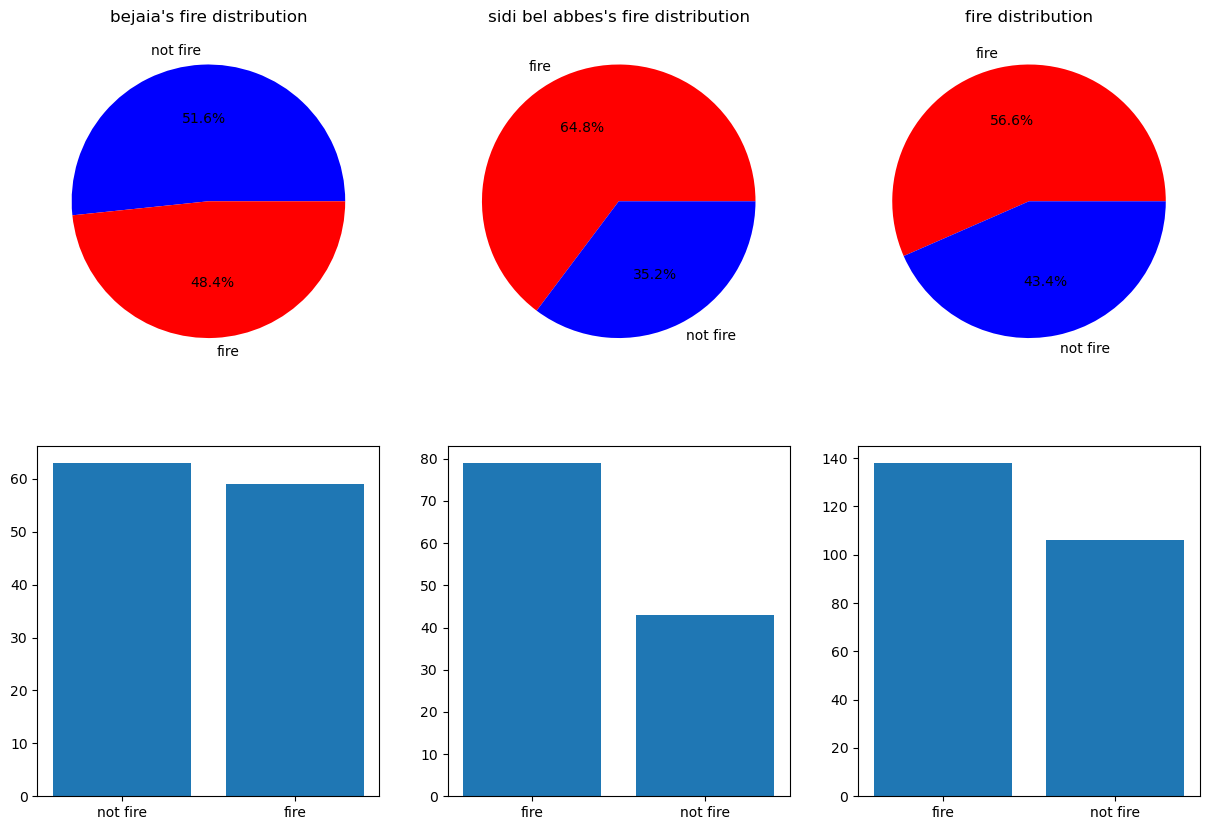

In [37]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

ax[0, 0].set_title("bejaia's fire distribution")
b_fire_counts = bejaia_df["Classes"].value_counts()
ax[0, 0].pie(
    b_fire_counts, labels=b_fire_counts.index, autopct="%.1f%%", colors=["blue", "red"]
)
ax[1, 0].bar(b_fire_counts.index.values, b_fire_counts.values)

ax[0, 1].set_title("sidi bel abbes's fire distribution")
s_fire_counts = sidi_bel_abbes_df["Classes"].value_counts()
ax[0, 1].pie(
    s_fire_counts, labels=s_fire_counts.index, autopct="%.1f%%", colors=["red", "blue"]
)
ax[1, 1].bar(s_fire_counts.index.values, s_fire_counts.values)

ax[0, 2].set_title("fire distribution")
fire_counts = df["Classes"].value_counts()
ax[0, 2].pie(
    fire_counts, labels=fire_counts.index, autopct="%.1f%%", colors=["red", "blue"]
)
ax[1, 2].bar(fire_counts.index.values, fire_counts.values)

plt.show()

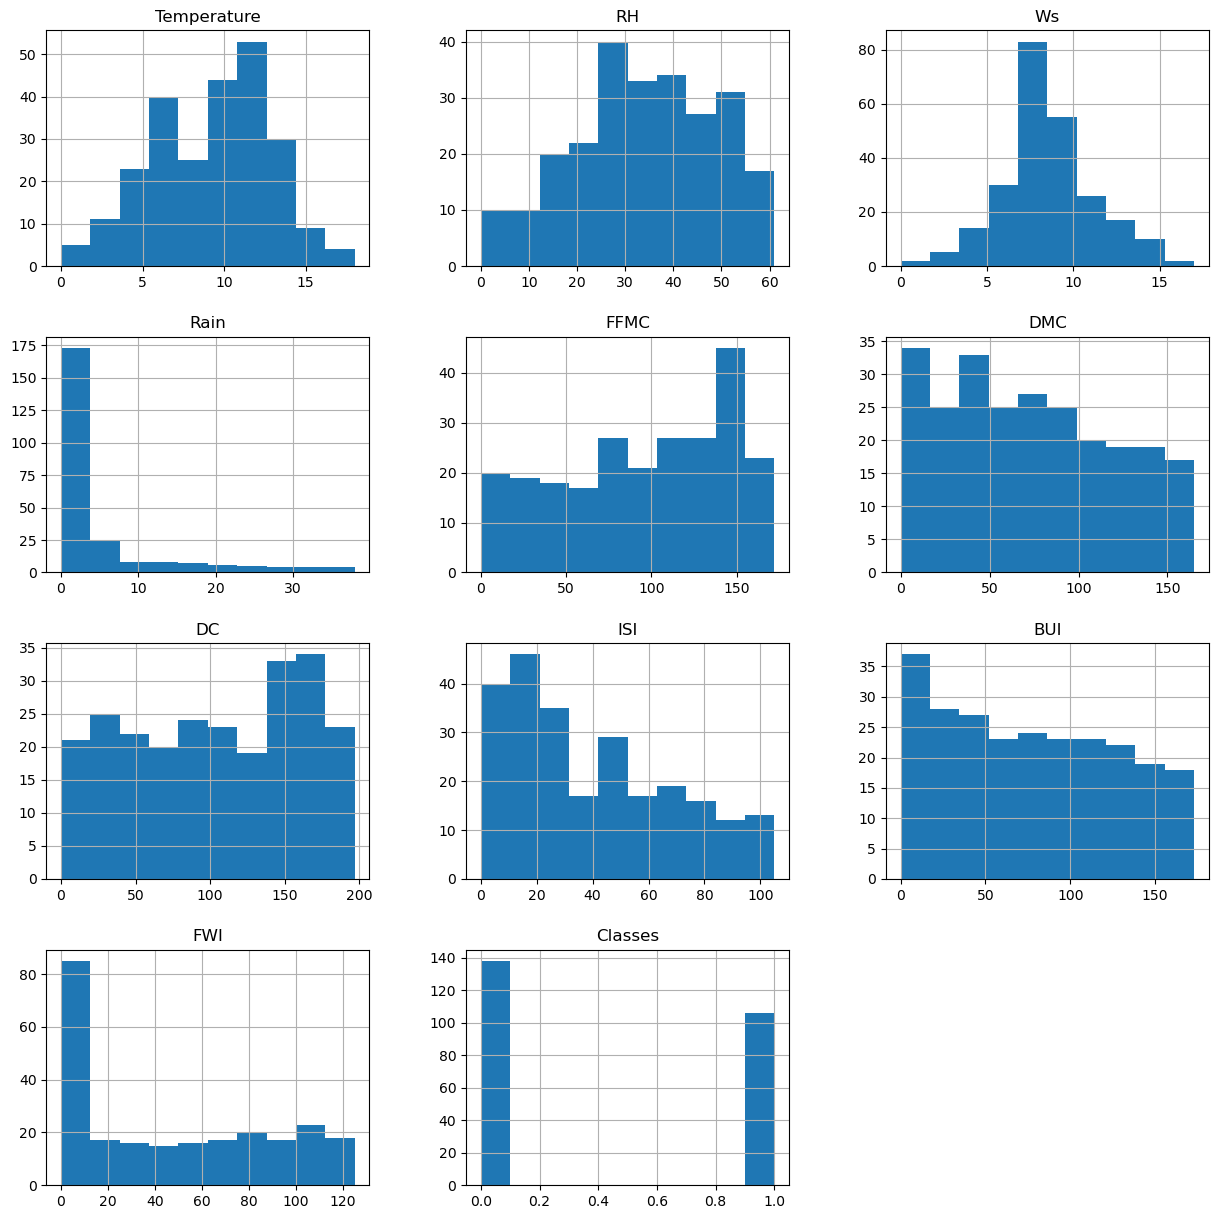

In [16]:
df_hist = ndf.iloc[:,3:].hist(figsize=(15,15))

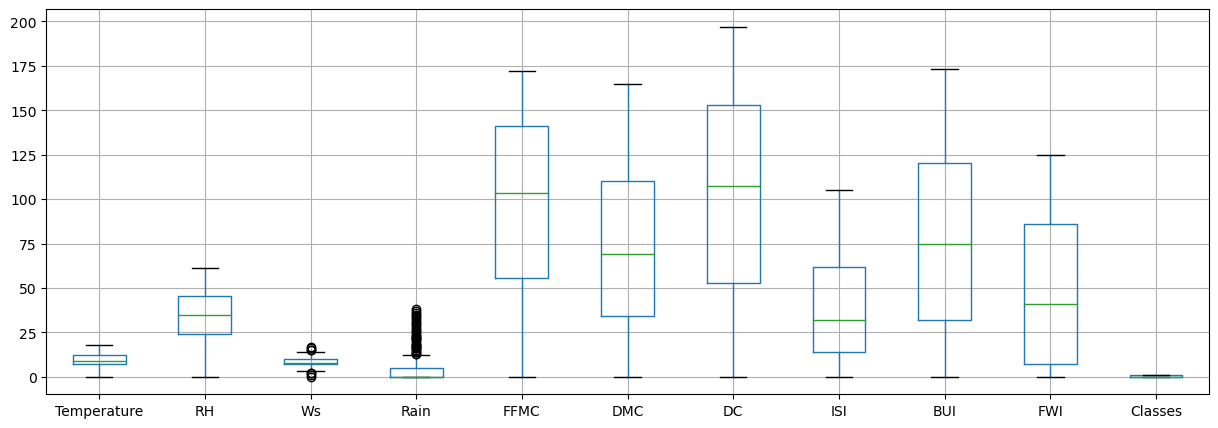

In [17]:
plt.figure(figsize=(15,5))
ax, df_bp = ndf.iloc[:,3:].boxplot(return_type="both")

<Axes: >

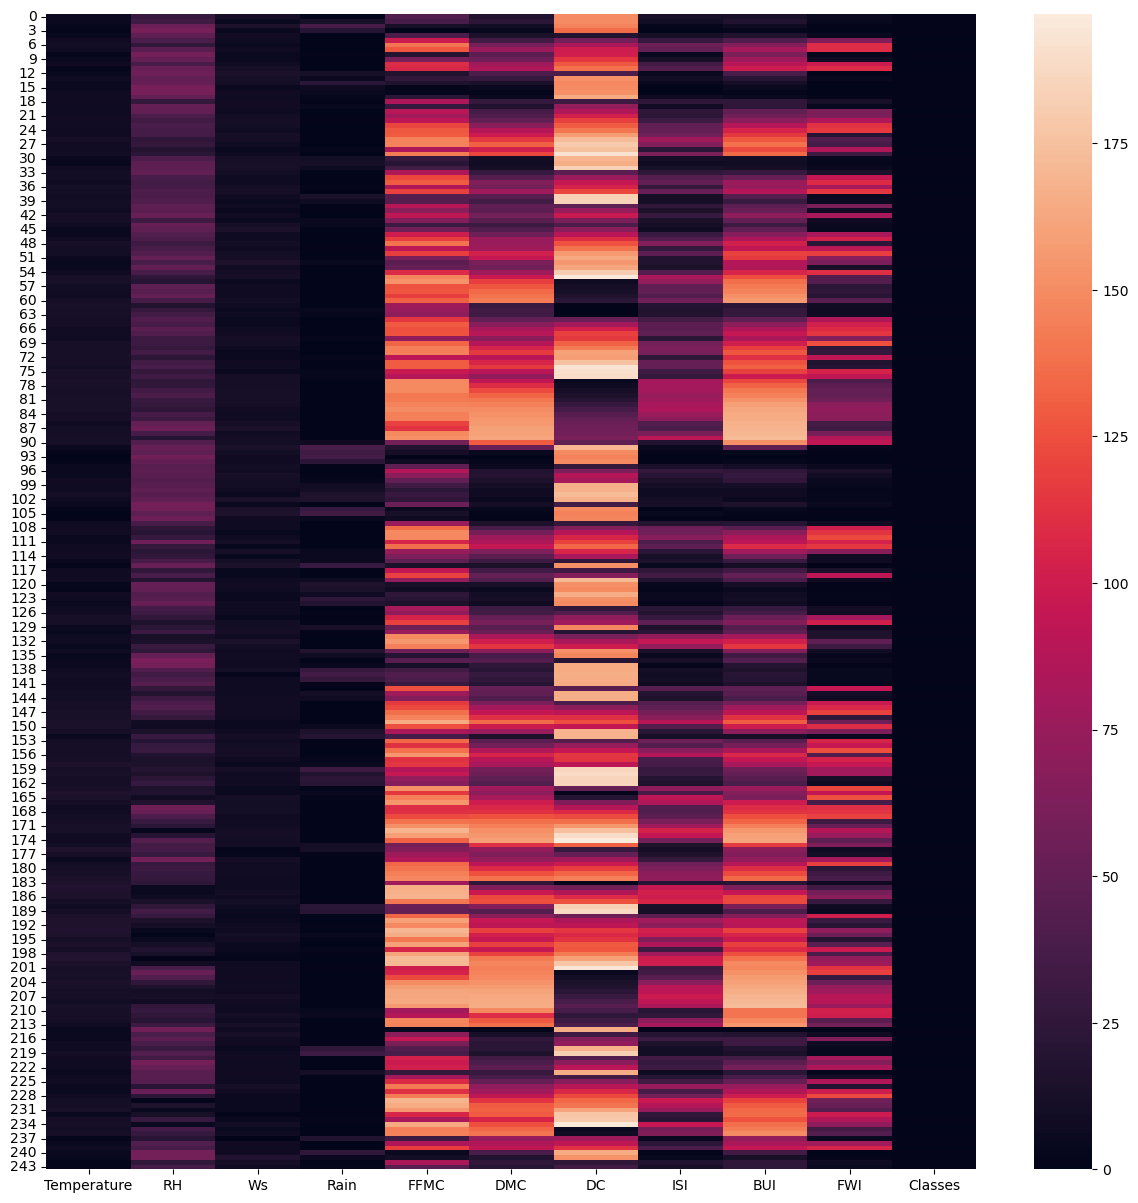

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(ndf.iloc[:,3:])